# PROBLEM 1

Part 1  
I think I can see two clear clusters here so I think it's pretty clustered. One in the top-left corner and the other cluster is everything that's not that.

In [2]:
import sys
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt
from scipy import linalg

In [ ]:
#X IS FEATURE; Y IS CLASS
# Data Loading
iris = np.genfromtxt("data/iris.txt",delimiter=None) # load the text file
Y = iris[:,-1] # target value is the last column
X = iris[:,0:2] # first two features

In [2]:
colors = ['red','green']

plt.scatter(X[:,0], X[:,1], color=colors[0])
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

<Figure size 640x480 with 1 Axes>

Part 2  
k = 2 all types of inits have the same score  
k = 5 best score is init = farthest  
k = 20 best score is init = random 

In [13]:
#def kmeans(X, K, init='random', max_iter=100)
#init = random, farthest, k++
#return z, c, sumd
#z: N x 1 array containing cluster numbers of data at indices in X.
#c: K x M array of cluster centers.
#sumd: (scalar) sum of squared euclidean distances.

k = [2, 5, 20]
inits = ['random','farthest','k++']
#print(len(k))
#i got some error about using a list for z[i] so i did this and it works
#however the z2, z5, z20... stuff is all useless since values were assigned to z[0], z[1], z[2], etc
z2=z5=z20= c2=c5=c20= sumd2=sumd5=sumd20 = 0
z = [z2,z5,z20]
c = [c2,c5,c20]
sumd = [sumd2,sumd5,sumd20]

for i,j in enumerate(k):
    for gg in inits:
        [z[i], c[i], sumd[i]] = ml.cluster.kmeans(X, j, init=gg)
        print('init = {}, k = {}, z = {}, c = {}, sumD = {}'.format(gg, k[i] ,z[i], c[i], sumd[i]))

init = random, k = 2, z = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0.], c = [[6.65748012 3.01305631]
 [5.25633386 3.17192434]], sumD = 57.877648396983034
init = farthest, k = 2, z = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

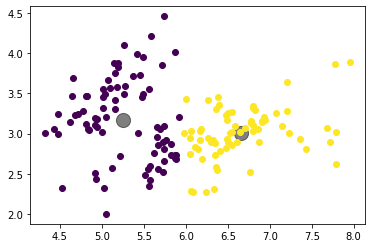

In [30]:
#k = 2 all types of inits have the same score  
#k = 5 best score is init = farthest  
#k = 20 best score is init = random 
[z2, c2, sumd2] = ml.cluster.kmeans(X, 2, init='random')
ml.plotClassify2D(None, X, z2)
for i in range(0,len(c2)):
    plt.scatter(c2[i][0], c2[i][1], c='black', s=200, alpha=0.5);
plt.show()

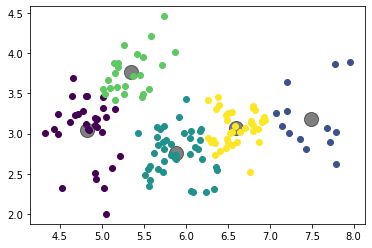

In [27]:
[z5, c5, sumd5] = ml.cluster.kmeans(X, 5, init='farthest')
ml.plotClassify2D(None, X, z5)
for i in range(0,len(c5)):
    plt.scatter(c5[i][0], c5[i][1], c='black', s=200, alpha=0.5);
plt.show()

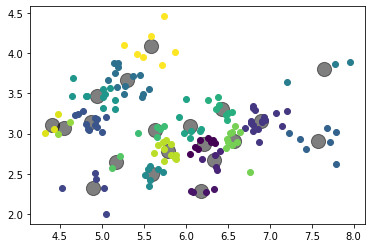

In [31]:
[z20, c20, sumd20] = ml.cluster.kmeans(X, 20, init='random')
ml.plotClassify2D(None, X, z20)
for i in range(0,len(c20)):
    plt.scatter(c20[i][0], c20[i][1], c='black', s=200, alpha=0.5);
plt.show()

Part 3

In [4]:
#agglomerative(X, K, method='means', join=None)
#x = X; K = k; method = min, max, means, average
#min = single linkage
#max = total linkage
k = [2,5,20]
[z2, join2] = ml.cluster.agglomerative(X, 2, method='min')
[z5, join5] = ml.cluster.agglomerative(X, 5, method='min')
[z20, join20] = ml.cluster.agglomerative(X, 20, method='min')

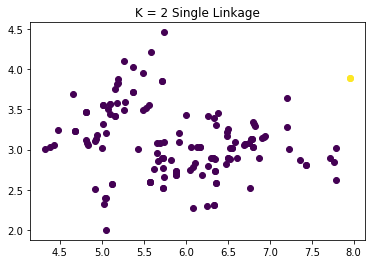

In [5]:
ml.plotClassify2D(None, X, z2)
plt.title('K = {} Single Linkage'.format(k[0]))
plt.show()

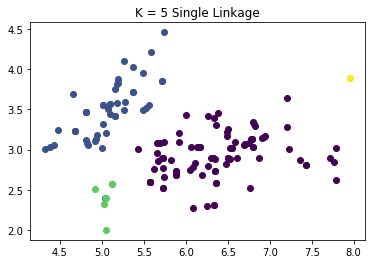

In [6]:
ml.plotClassify2D(None, X, z5)
plt.title('K = {} Single Linkage'.format(k[1]))
plt.show()

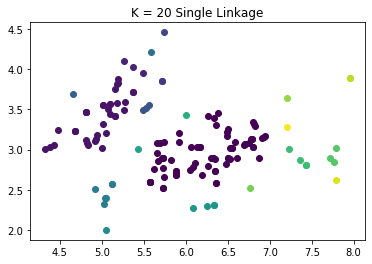

In [7]:
ml.plotClassify2D(None, X, z20)
plt.title('K = {} Single Linkage'.format(k[2]))
plt.show()

In [8]:
#agglomerative(X, K, method='means', join=None)
#x = X; K = k; method = min, max, means, average
#min = single linkage
#max = total linkage
[z2, join2] = ml.cluster.agglomerative(X, 2, method='max')
[z5, join5] = ml.cluster.agglomerative(X, 5, method='max')
[z20, join20] = ml.cluster.agglomerative(X, 20, method='max')

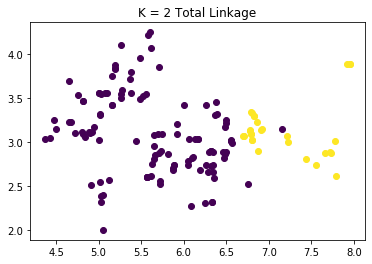

In [9]:
ml.plotClassify2D(None, X, z2)
plt.title('K = {} Total Linkage'.format(k[0]))
plt.show()

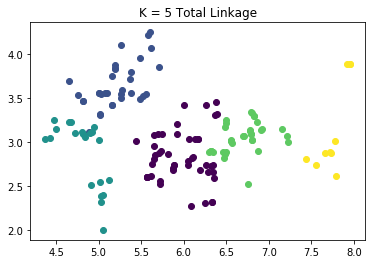

In [10]:
ml.plotClassify2D(None, X, z5)
plt.title('K = {} Total Linkage'.format(k[1]))
plt.show()

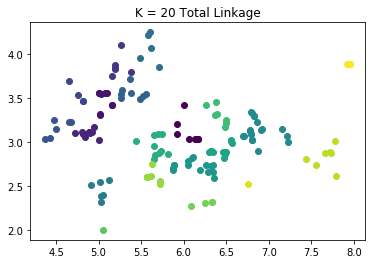

In [11]:
ml.plotClassify2D(None, X, z20)
plt.title('K = {} Total Linkage'.format(k[2]))
plt.show()

Part 4  
k-means looks to be the most similar to agglomerative clustering with total linkage. k-means is very different from the agglomerative clustering with the single linkage, though since each of the clusters for the agglomerative clustering with single linkage have the minimum amount of points per cluster while this is not the case for k-means since it doesn't have this trend regardless of the value of K.  
I think it's worth it to note that these similarities and differences are most easily seen at K=2 out of the values we tested.

# PROBLEM 2

Part 1

In [5]:
X = np.genfromtxt("data/faces.txt", delimiter=None) # load face dataset

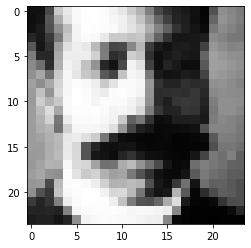

In [13]:
plt.figure()
# pick a data point i for display
img = np.reshape(X[1,:],(24,24)) # convert vectorized data to 24x24 image patches
plt.imshow( img.T , cmap="gray") # display image patch; you may have to squint

In [14]:
print(X.shape)
#4916 faces

(4916, 576)


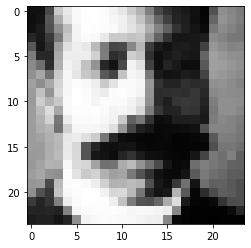

In [6]:
X0 = X - np.mean(X)
img2 = np.reshape(X0[1,:],(24,24)) # convert vectorized data to 24x24 image patches
plt.imshow( img2.T , cmap="gray") # display image patch; you may have to squint

Part 2

In [7]:
U, S, Vh = linalg.svd(X0, full_matrices = False)
W = np.dot(U, np.diag(S))
print(W.shape)
print(Vh.shape)

(4916, 576)
(576, 576)


Part 3

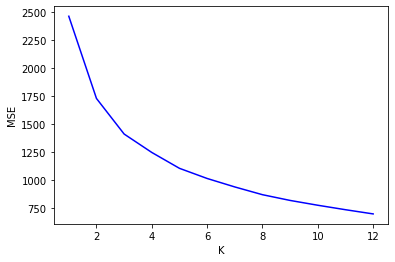

In [13]:
k2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
mse = []
for i in k2:
    X0hat = np.dot(W[:,:i],Vh[:i,:])
    mse = np.append(mse, np.mean((X0-X0hat)**2))
plt.plot(k2, mse, color = 'blue')
plt.xlabel('K')
plt.ylabel('MSE')
plt.show()

Part 4

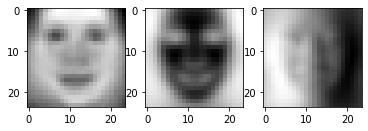

In [15]:
# PLUS
mu = np.mean(X)
fig, ax = plt.subplots(1,3) #rows, columns
for i in range(0,3,1):
    alpha = 2*np.median(np.abs(W[:,i]))
    img = np.reshape(mu + alpha*Vh[i,:], (24,24))
    ax[i].imshow( img.T , cmap="gray") # display image patch; you may have to squint

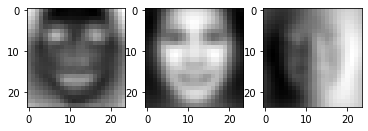

In [16]:
# MINUS
mu = np.mean(X)
fig, ax = plt.subplots(1,3) #rows, columns
for i in range(0,3,1):
    alpha = 2*np.median(np.abs(W[:,i]))
    img = np.reshape(mu - alpha*Vh[i,:], (24,24))
    ax[i].imshow( img.T , cmap="gray") # display image patch; you may have to squint

Part 5

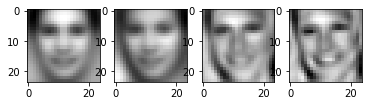

In [18]:
# face 400 something
k = [5, 10, 50, 100]
fig, ax = plt.subplots(1,4) #rows, columns
for i,j in enumerate(k):
    X0hat = np.dot(W[420,:j], Vh[:j,:])
    img = np.reshape(X0hat, (24,24))
    ax[i].imshow( img.T , cmap="gray") # display image patch; you may have to squint

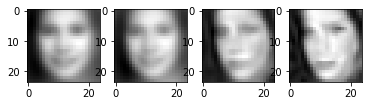

In [19]:
# face 1300 something
k = [5, 10, 50, 100]
fig, ax = plt.subplots(1,4) #rows, columns
for i,j in enumerate(k):
    X0hat = np.dot(W[1337,:j], Vh[:j,:])
    img = np.reshape(X0hat, (24,24))
    ax[i].imshow( img.T , cmap="gray") # display image patch; you may have to squint

Part 6

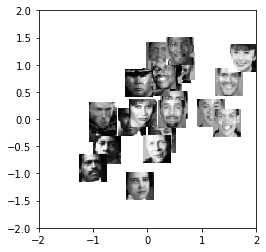

In [20]:
idx = range(0,25) # pick some data (randomly or otherwise); an array of integer indices

import mltools.transforms

coord,params = ml.transforms.rescale( W[:,0:2] ) # normalize scale of "W"locations
plt.figure()
# plt.hold(True) # you may need this for pyplot
for i in idx:
    # compute where to place image (scaled W values) & size
    loc = (coord[i,0],coord[i,0]+0.5, coord[i,1],coord[i,1]+0.5)
    img = np.reshape( X[i,:], (24,24) ) # reshape to square
    plt.imshow( img.T , cmap="gray", extent=loc ) # draw each image
    plt.axis( (-2,2,-2,2) ) # set axis to a reasonablescale

# Statement of Collaboration  
I used Google, lecture slides, and previous good homework submissions provided to us. I used the official scipy/numpy documentation, geeksforgeeks.org, Piazza, matplotlib documentation, and the official Jupyter Notebook documentation.
I collaborated with Kevin De Jesus and Julian Andrews as well.